In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
df = pd.read_csv("./story_dataset.csv")
df

,prompt_id,prompt,story,hidden_state_file,len_generated_story,len_new_story
0,1,Once upon a time there was a dragon,Once upon a time there was a dragon named Blaz...,./hidden_states/prompt_1.npz,270,271
1,1,Once upon a time there was a dragon,Once upon a time there was a dragon named Spar...,./hidden_states/prompt_1.npz,349,350
2,1,Once upon a time there was a dragon,Once upon a time there was a dragon named Scor...,./hidden_states/prompt_1.npz,278,278
3,1,Once upon a time there was a dragon,Once upon a time there was a dragon. The drago...,./hidden_states/prompt_1.npz,117,118
4,1,Once upon a time there was a dragon,Once upon a time there was a dragon. The drago...,./hidden_states/prompt_1.npz,129,130
...,...,...,...,...,...,...
9995,10,Once upon a time there was a poor boy,Once upon a time there was a poor boy named Ti...,./hidden_states/prompt_10.npz,289,290
9996,10,Once upon a time there was a poor boy,Once upon a time there was a poor boy named Ti...,./hidden_states/prompt_10.npz,119,119
9997,10,Once upon a time there was a poor boy,Once upon a time there was a poor boy named Ti...,./hidden_states/prompt_10.npz,127,128
9998,10,Once upon a time there was a poor boy,Once upon a time there was a poor boy named Ti...,./hidden_states/prompt_10.npz,441,441


## Token Length Analysis

(array([1.610e+02, 3.394e+03, 1.066e+03, 2.000e+00, 1.660e+02, 1.494e+03,
        3.970e+02, 6.370e+02, 1.323e+03, 1.360e+03]),
 array([ 21. ,  71.1, 121.2, 171.3, 221.4, 271.5, 321.6, 371.7, 421.8,
        471.9, 522. ]),
 <BarContainer object of 10 artists>)

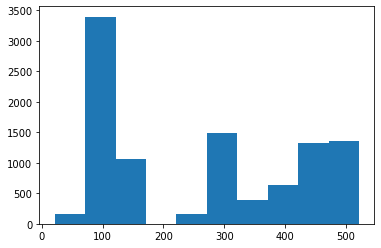

In [3]:
plt.hist(df["len_generated_story"])

(array([1.690e+02, 3.454e+03, 9.980e+02, 2.000e+00, 1.690e+02, 1.493e+03,
        3.950e+02, 6.410e+02, 1.324e+03, 1.355e+03]),
 array([ 22. ,  72.1, 122.2, 172.3, 222.4, 272.5, 322.6, 372.7, 422.8,
        472.9, 523. ]),
 <BarContainer object of 10 artists>)

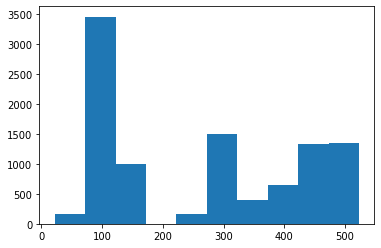

In [4]:
plt.hist(df["len_new_story"])

(array([1.000e+00, 0.000e+00, 0.000e+00, 4.143e+03, 0.000e+00, 0.000e+00,
        5.854e+03, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([-1. , -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ]),
 <BarContainer object of 10 artists>)

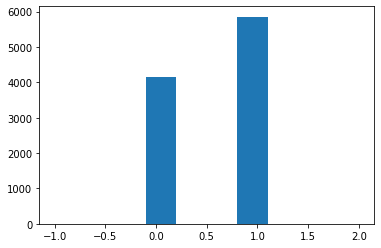

In [5]:
plt.hist(df["len_new_story"] - df["len_generated_story"])

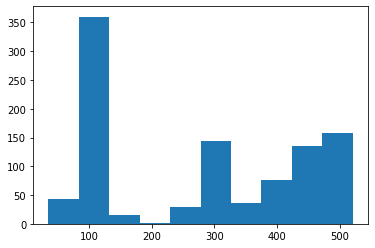

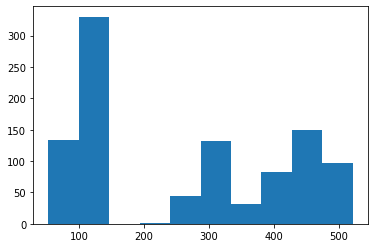

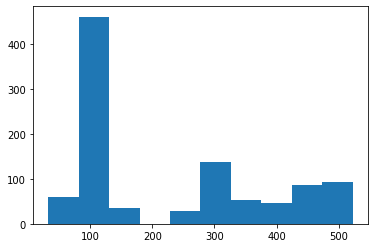

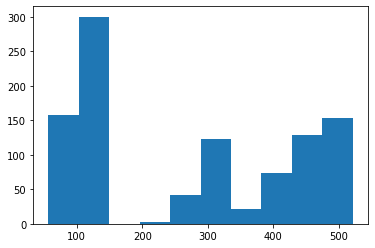

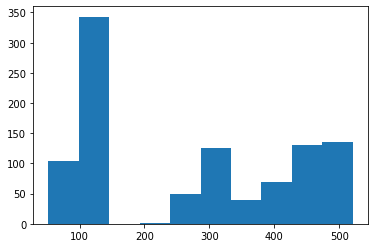

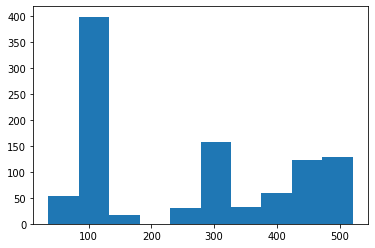

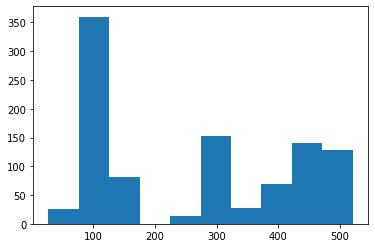

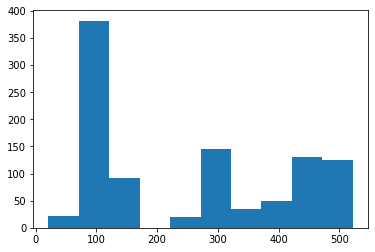

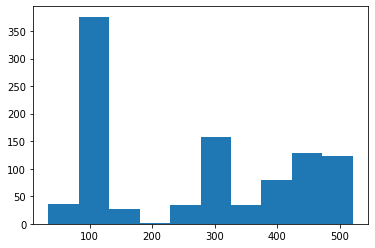

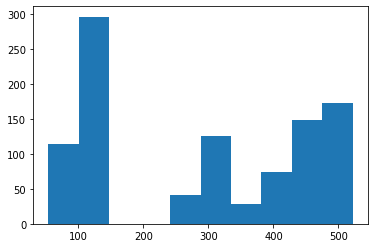

In [6]:
for i in range(10):
    plt.hist(df["len_generated_story"][i * 1000:i * 1000 + 1000])
    plt.show()

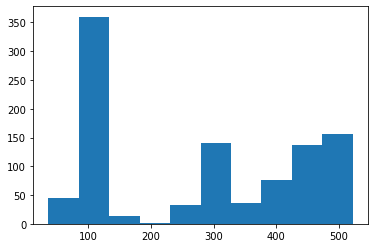

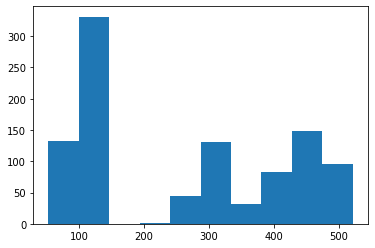

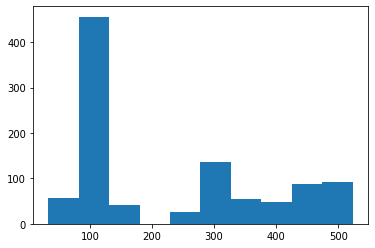

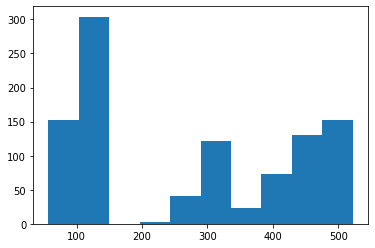

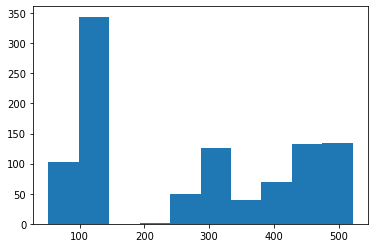

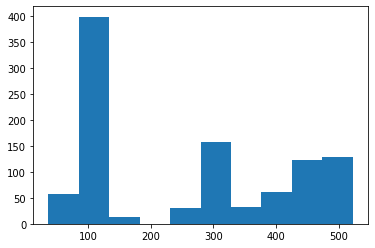

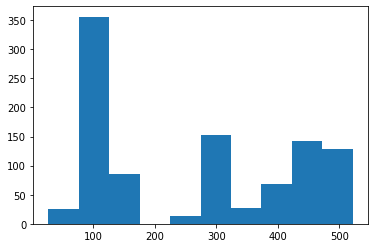

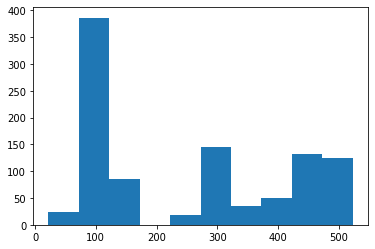

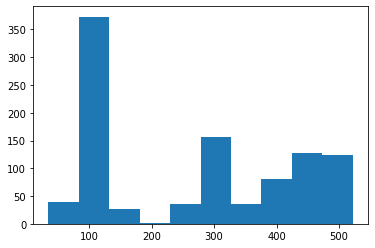

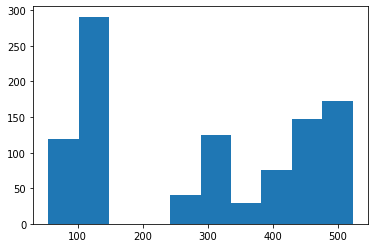

In [7]:
for i in range(10):
    plt.hist(df["len_new_story"][i * 1000:i * 1000 + 1000])
    plt.show()

## Sparsity Plots

In [8]:
# Before Padding
hidden_states_by_layer_padded = {}
hidden_states_by_layer = {}
NUM_PROMPTS = 10
max_story_len = max(df["len_generated_story"])

for prompt_id in range(1, NUM_PROMPTS + 1):
    with np.load(f'./hidden_states/prompt_{prompt_id}.npz') as loaded_data:
        for i in tqdm(range(1000)):
            curr_hidden_states = loaded_data[f"arr_{i}"][0]
            for layer in range(1):
                padded_arr = np.zeros((max_story_len, 512))
                padded_arr_len = len(curr_hidden_states[layer][0])
                
                padded_arr[:padded_arr_len] = curr_hidden_states[layer][0]
                
                padded_arr = padded_arr.flatten()
                
                if(f"layer_{layer}" in hidden_states_by_layer):
                    hidden_states_by_layer_padded[f"layer_{layer}"].append(padded_arr)
                    hidden_states_by_layer[f"layer_{layer}"].append(curr_hidden_states[layer][0].flatten())
                else:
                    hidden_states_by_layer_padded[f"layer_{layer}"] = [padded_arr]
                    hidden_states_by_layer[f"layer_{layer}"] = [curr_hidden_states[layer][0].flatten()]

100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:35<00:00, 10.44it/s]


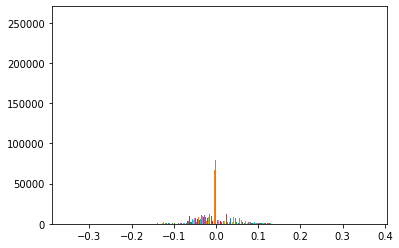

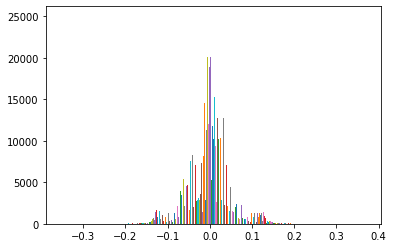

In [9]:
plt.hist(hidden_states_by_layer_padded["layer_0"], bins = 100)
plt.show()
plt.hist(hidden_states_by_layer["layer_0"], bins = 100)
plt.show()

In [10]:
# Post-Padding